In [ ]:
# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

# 할당된 GPU 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")
if gpus:
  try:
    # GPU 메모리 사용 설정
    tf.config.experimental.set_memory_growth(gpus[0], True)  
  except RuntimeError as re:
    print(re)

# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터 로드

import pandas as pd

sonar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/sonar.csv', header = None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# 데이터 분리
datasets = sonar.values
X = datasets[:,:60]
y = datasets[:,60]

In [ ]:
# 문자열로 된 데이터를 숫자로 변경
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(y)
y = e.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# 훈련과 테스트셋을 분리, 데이터 섞어주기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2022)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145, 60), (63, 60), (145,), (63,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 설계
model1 = Sequential()

# 입력층
model1.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model1.add(Dense(units=120, activation = 'relu'))
model1.add(Dense(units=60, activation = 'relu'))
model1.add(Dense(units=30, activation = 'relu'))
# 출력층
model1.add(Dense(units=1, activation = 'sigmoid'))

#  모델 정보 요약
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                3904      
                                                                 
 dense_23 (Dense)            (None, 120)               7800      
                                                                 
 dense_24 (Dense)            (None, 60)                7260      
                                                                 
 dense_25 (Dense)            (None, 30)                1830      
                                                                 
 dense_26 (Dense)            (None, 1)                 31        
                                                                 
Total params: 20,825
Trainable params: 20,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 실행방법 설정
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [ ]:
# 넘파이 배열을 텐서타입으로 바꿔줘야한다 (object to array)
import numpy as np
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
# # 벨리데이션이 없는데 벨리데이션이 있는 것 처럼 하는 방법 
# # 과적합 되는지 학습하면서 확인하는 방법(벨리데이션 줘서 비교)
# h = model1.fit(X_train, y_train, epochs=100, batch_size=20, validation_split = 0.3)  # 과적합 방지보다는 과적합 되는지 확인하는 용도 

In [ ]:
# # 벨리데이션 넣은 모델 학습
h = model1.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.6869 - accuracy: 0.4966 - val_loss: 0.6644 - val_accuracy: 0.7460
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.7655 - val_loss: 0.6554 - val_accuracy: 0.7143
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6414 - accuracy: 0.7586 - val_loss: 0.6320 - val_accuracy: 0.7143
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.7517 - val_loss: 0.6032 - val_accuracy: 0.6984
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5759 - accuracy: 0.7724 - val_loss: 0.5632 - val_accuracy: 0.7619
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7655 - val_loss: 0.5992 - val_accuracy: 0.6825
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5089 - accuracy: 0.7862 - val_loss: 0.5016 - val_accuracy: 0.7619
Epoch 8/100
8/8 [=========

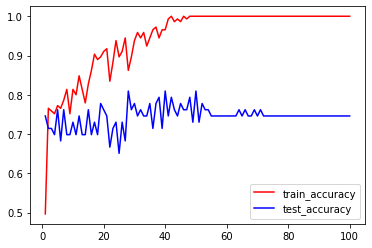

In [ ]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h.history["accuracy"]
val_accuracy = h.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')

In [ ]:
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

5/5 [==============================] - 0s 3ms/step - loss: 9.7596e-04 - accuracy: 1.0000
[0.000975964474491775, 1.0]
2/2 [==============================] - 0s 7ms/step - loss: 1.0494 - accuracy: 0.7460
[1.0494089126586914, 0.7460317611694336]


# 과적합 방지

- Dropout : 특정 층에 dropout을 쓰면 특정 층에 있는 노드 중 해당 %만큼을 랜덤하게 사용하지 않도록 해서 학습의 방향을 강제로 틀어서 과적합 방지

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 모델 설계
model2 = Sequential()

# 입력층
model2.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model2.add(Dense(units=120, activation = 'relu'))
model2.add(Dropout(0.3))  # 드랍아웃은 선언 된 위 층에 정의 됨
model2.add(Dense(units=60, activation = 'relu'))
model2.add(Dropout(0.3)) 
model2.add(Dense(units=30, activation = 'relu'))
model2.add(Dropout(0.3)) 
# 출력층
model2.add(Dense(units=1, activation = 'sigmoid'))

#  모델 정보 요약
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                3904      
                                                                 
 dense_28 (Dense)            (None, 120)               7800      
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense_29 (Dense)            (None, 60)                7260      
                                                                 
 dropout_4 (Dropout)         (None, 60)                0         
                                                                 
 dense_30 (Dense)            (None, 30)                1830      
                                                                 
 dropout_5 (Dropout)         (None, 30)               

In [ ]:
# 실행방법 설정
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [ ]:
# # 벨리데이션 넣은 모델 학습
h2 = model2.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

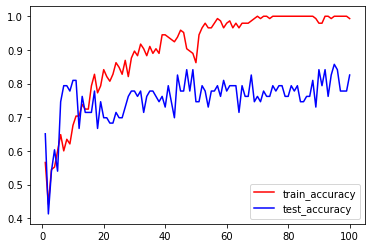

In [ ]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h2.history["accuracy"]
val_accuracy = h2.history["val_accuracy"]

# 반복 수

xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')

In [ ]:
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

5/5 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
[0.0016113859601318836, 1.0]
2/2 [==============================] - 0s 7ms/step - loss: 0.7232 - accuracy: 0.8254
[0.7232043743133545, 0.8253968358039856]


In [ ]:
# 모델 설계
model3 = Sequential()

# 입력층
model3.add(Dense(units=64, input_dim=60, activation = 'relu'))
# 은닉층
model3.add(Dense(units=84, activation = 'relu'))
model3.add(Dense(units=42, activation = 'relu'))
model3.add(Dense(units=21, activation = 'relu'))
# 출력층
model3.add(Dense(units=1, activation = 'sigmoid'))

# 실행방법 설정
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

# # 벨리데이션 넣은 모델 학습
h3 = model3.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))

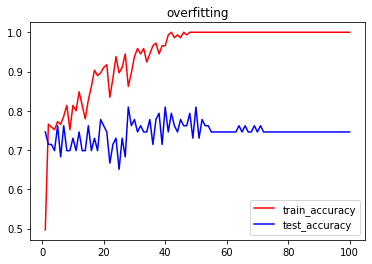

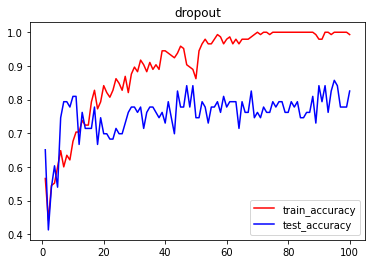

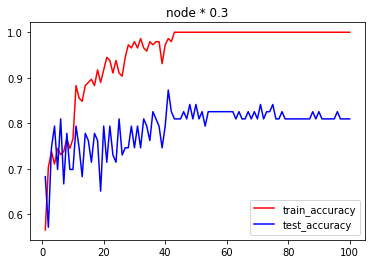

In [ ]:
# 벨리데이션 넣은 경우 matplotlib으로 그래프 그리기
import matplotlib.pyplot as plt

# 학습 결과에서 accuracy 값들을 가져온다
accuracy = h.history["accuracy"]
val_accuracy = h.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1) 
plt.plot(xaxis, accuracy, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("overfitting")
plt.show()

# 학습 결과에서 accuracy 값들을 가져온다
accuracy2 = h2.history["accuracy"]
val_accuracy2 = h2.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy2, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy2, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("dropout")
plt.show()

# 학습 결과에서 accuracy 값들을 가져온다
accuracy3 = h3.history["accuracy"]
val_accuracy3 = h3.history["val_accuracy"]

# 반복 수
xaxis = range(1, len(accuracy)+1)
plt.plot(xaxis, accuracy3, "r", label="train_accuracy")
plt.plot(xaxis, val_accuracy3, "b", label="test_accuracy")
plt.legend(loc='lower right')
plt.title("node * 0.3")
plt.show()
